In [301]:
# IMPORTS
# Libraries for data processing
import pandas as pd
import numpy as np

# Visualisation libraries (required for PHASE 2)
import seaborn as sns
import matplotlib.pyplot as plt

# Library for null imputation
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # Necesario para habilitar IterativeImputer
from sklearn.impute import IterativeImputer

# Library for use xi2
from scipy.stats import chi2_contingency



# To display all columns correctly
pd.set_option('display.max_columns', None)

# Phase 1: Exploratory Data Analysis (EDA).

In [302]:
# Data reading (CSV file)
df_employees = pd.read_csv('Files/HR RAW DATA.csv')

# Reading the first 5 rows
df_employees.head(5)

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


In [303]:
# Reading 10 random rows
df_employees.sample(10)


,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
1261,1261,35,Yes,travel_rarely,"556,0$",NaN,23,2,NaN,1,NaN,2,0,50,2,2,MAnufACTuRiNG DIReCTOR,3,NaN,NaN,15497,3,Y,Yes,13,"3,0",1,NaN,0,"8,0",1,"3,0",1,NaN,0,1,NaN,1988,1000000000$,NaN,NaN,True
861,861,25,No,travel_rarely,"685,0$",NaN,1,3,NaN,1,"350,0",1,1,62,3,2,mAnUFacTuriNg dIRECTOR,3,Married,NaN,7505,0,Y,No,12,"3,0",4,NaN,2,"5,0",3,"3,0",4,NaN,1,2,NaN,1998,1000000000$,NaN,NaN,0
552,552,47,No,travel_rarely,"465,0$",NaN,1,3,NaN,1,"1438,0",1,0,74,3,1,reSEarCh ScIeNTIST,4,NaN,"3420,0",10205,7,Y,No,12,"3,0",3,"80,0",1,"17,0",2,"2,0",6,NaN,1,2,"3420,0",1976,1000000000$,NaN,NaN,True
465,465,40,No,travel_rarely,"1137,0$",Research & Development,1,4,NaN,1,NaN,1,0,98,3,4,MaNagEr,1,NaN,NaN,18991,2,Y,NaN,11,"3,0",1,NaN,1,"22,0",3,NaN,19,NaN,11,16,NaN,1983,1000000000$,MaNagEr - Research & Development,NaN,True
857,857,33,No,travel_rarely,"832,0$",NaN,5,4,Life Sciences,1,"338,0",3,1,63,2,1,ResEaRch sciEnTIsT,4,Married,"2911,0",14776,1,NaN,NaN,13,"3,0",3,NaN,1,"2,0",2,"2,0",2,NaN,0,2,"2911,0",1990,1000000000$,NaN,NaN,Yes
840,840,53,No,NaN,"1084,0$",NaN,13,2,NaN,1,"250,0",4,1,Not Available,4,2,mAnufACTuRInG dIReCtoR,1,divorced,NaN,26250,1,Y,No,11,"3,0",3,NaN,2,"5,0",3,"3,0",4,"2,0",1,3,NaN,1970,1000000000$,NaN,NaN,False
1035,1035,27,No,travel_frequently,"793,0$",NaN,2,1,Life Sciences,1,"1371,0",4,0,43,1,2,sales executiVE,4,Single,"5071,0",20392,3,Y,No,20,"4,0",2,NaN,0,NaN,3,"3,0",6,NaN,0,0,"5071,0",1996,1000000000$,NaN,NaN,False
984,984,27,No,NaN,"1055,0$",Research & Development,2,4,NaN,1,"1027,0",1,1,47,3,2,mANufActuRIng DirECTOR,4,NaN,"4227,0",4658,0,Y,NaN,18,"3,0",2,NaN,1,NaN,2,NaN,3,NaN,2,2,"4227,0",1996,1000000000$,mANufActuRIng DirECTOR - Research & Develop...,NaN,Yes
1412,1412,36,No,travel_rarely,"884,0$",NaN,1,4,Life Sciences,1,NaN,2,1,73,3,2,saLEs EXECUTive,3,Single,"6815,0",21447,6,NaN,No,13,"3,0",1,NaN,0,NaN,5,"3,0",1,NaN,0,0,"6815,0",1987,1000000000$,NaN,NaN,1
239,239,50,No,NaN,"1234,0$",NaN,20,5,Medical,1,"1606,0",2,0,41,3,4,hEaLthCare repResEntaTIVe,3,NaN,"11245,0",20689,2,NaN,NaN,15,"3,0",3,"80,0",1,"32,0",3,"3,0",30,NaN,12,13,"11245,0",1973,1000000000$,NaN,NaN,0


In [304]:
# Reading the last 5 rows

df_employees.tail(10)

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
1604,1604,41,Yes,NaN,"1085,0$",Research & Development,2,4,Life Sciences,1,"927,0",2,1,Not Available,1,1,LAbORAToRy tEcHNICian,4,divorced,NaN,17725,4,NaN,Yes,13,"3,0",3,"80,0",1,NaN,1,"2,0",7,NaN,1,0,NaN,1982,1000000000$,LAbORAToRy tEcHNICian - Research & Developm...,NaN,Yes
1605,1605,31,No,travel_rarely,"154,0$",NaN,7,4,NaN,1,"941,0",2,0,Not Available,2,1,SAlES rEpreSENtaTiVe,3,NaN,"2329,0",11737,3,NaN,NaN,15,NaN,2,"80,0",0,NaN,2,"4,0",7,NaN,5,2,"2329,0",1992,1000000000$,NaN,NaN,True
1606,1606,26,No,travel_frequently,"1283,0$",Sales,1,3,Medical,1,"956,0",3,0,52,2,2,sAleS EXECUtIvE,1,NaN,"4294,0",11148,1,Y,NaN,12,"3,0",2,NaN,0,NaN,2,"3,0",7,NaN,0,7,"4294,0",1997,1000000000$,sAleS EXECUtIvE - Sales,NaN,1
1607,1607,31,No,NaN,"616,0$",NaN,12,3,Medical,1,NaN,4,1,41,3,2,HEaltHCarE REPreSENtAtIve,4,NaN,NaN,17369,0,NaN,NaN,11,"3,0",3,NaN,2,"10,0",2,"1,0",9,NaN,8,5,NaN,1992,1000000000$,NaN,NaN,True
1608,1608,32,No,NaN,"498,0$",NaN,3,4,Medical,1,"966,0",3,1,93,3,2,MANUfaCtuRiNG DiReCtor,1,Married,"6725,0",13554,1,NaN,NaN,12,"3,0",3,NaN,1,"8,0",2,"4,0",8,NaN,6,3,"6725,0",1991,1000000000$,NaN,NaN,1
1609,1609,36,Yes,travel_rarely,"530,0$",NaN,3,1,Life Sciences,1,"967,0",3,0,51,2,3,saLEs ExeCUTiVe,4,Married,"10325,0",5518,1,Y,NaN,11,NaN,1,NaN,1,NaN,6,"3,0",16,NaN,3,7,"10325,0",1987,1000000000$,NaN,NaN,0
1610,1610,45,No,non-travel,"805,0$",NaN,4,2,NaN,1,"972,0",3,0,57,3,2,LAboRaTOry tECHNiCIAn,2,NaN,"4447,0",23163,1,NaN,NaN,12,"3,0",2,NaN,0,NaN,5,"2,0",9,NaN,0,8,"4447,0",1978,1000000000$,NaN,NaN,1
1611,1611,39,No,travel_rarely,"903,0$",NaN,-13,5,NaN,1,NaN,13,0,41,4,3,sAlES ExECUTivE,3,Single,NaN,2560,0,NaN,No,18,"3,0",4,NaN,0,"9,0",3,"3,0",8,NaN,0,7,NaN,1984,1000000000$,NaN,NaN,Yes
1612,1612,36,No,non-travel,"1229,0$",NaN,8,4,Technical Degree,1,"990,0",1,0,84,3,2,SaLes ExecUtIVe,4,Divorced,NaN,25952,4,NaN,No,13,NaN,4,NaN,2,"12,0",3,"3,0",7,NaN,0,7,NaN,1987,1000000000$,NaN,NaN,True
1613,1613,46,No,NaN,"566,0$",NaN,7,2,Medical,1,NaN,4,0,75,3,3,mAnUfactURInG DiRECTOr,3,NaN,"10845,0",24208,6,Y,NaN,13,"3,0",2,NaN,1,NaN,3,"3,0",8,NaN,0,7,"10845,0",1977,1000000000$,NaN,NaN,0


In [305]:
# We check the data type of the columns and the presence of null values.
df_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1614 non-null   int64  
 1   Age                       1614 non-null   object 
 2   Attrition                 1614 non-null   object 
 3   BusinessTravel            842 non-null    object 
 4   DailyRate                 1614 non-null   object 
 5   Department                302 non-null    object 
 6   DistanceFromHome          1614 non-null   int64  
 7   Education                 1614 non-null   int64  
 8   EducationField            869 non-null    object 
 9   employeecount             1614 non-null   int64  
 10  employeenumber            1183 non-null   object 
 11  EnvironmentSatisfaction   1614 non-null   int64  
 12  Gender                    1614 non-null   int64  
 13  HourlyRate                1614 non-null   object 
 14  JobInvol

In [306]:
# Review of the form of the DF (how many rows and columns it has)
print(df_employees.shape)
print(f'The DataFrame has {df_employees.shape[0]} rows and {df_employees.shape[1]} columns.')

(1614, 42)
The DataFrame has 1614 rows and 42 columns.


In [307]:
# Review of the total number of values
print(f'The CSV file "HR RAW DATA" has {df_employees.size} values.')

The CSV file "HR RAW DATA" has 67788 values.


In [308]:
# Revision of the name of all the columns of the DataFrame
df_employees.columns

Index(['Unnamed: 0', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'employeecount', 'employeenumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NUMCOMPANIESWORKED', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TOTALWORKINGYEARS', 'TrainingTimesLastYear',
       'WORKLIFEBALANCE', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YEARSWITHCURRMANAGER',
       'SameAsMonthlyIncome', 'DateBirth', 'Salary', 'RoleDepartament',
       'NUMBERCHILDREN', 'RemoteWork'],
      dtype='object')

In [309]:
# Review the main statistical data of the DataFrame
df_employees.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1614.0,806.500000,466.065982,0.0,403.25,806.5,1209.75,1613.0
DistanceFromHome,1614.0,4.527261,14.591913,-49.0,2.00,5.0,11.00,29.0
Education,1614.0,2.925031,1.022357,1.0,2.00,3.0,4.00,5.0
employeecount,1614.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,1614.0,4.294919,6.993559,1.0,2.00,3.0,4.00,49.0
Gender,1614.0,0.398389,0.489718,0.0,0.00,0.0,1.00,1.0
JobInvolvement,1614.0,2.739777,0.711567,1.0,2.00,3.0,3.00,4.0
JobLevel,1614.0,2.068154,1.101344,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1614.0,2.738538,1.106163,1.0,2.00,3.0,4.00,4.0
MonthlyRate,1614.0,14284.495663,7110.414585,2094.0,8001.00,14248.5,20364.00,26999.0


In [310]:
# Review of the statistical data of the categorical variables in the DataFrame
df_employees.describe(include='object').T

,count,unique,top,freq
Age,1614,54,35,84
Attrition,1614,2,No,1355
BusinessTravel,842,3,travel_rarely,586
DailyRate,1614,849,nan$,124
Department,302,3,Research & Development,196
EducationField,869,6,Life Sciences,349
employeenumber,1183,1079,"482,0",2
HourlyRate,1614,72,Not Available,84
JobRole,1614,1579,mANager,4
MaritalStatus,963,5,Married,404


In [311]:
# Review the unique data and their frequencies for each column of the DataFrame.
# Using a loop, we iterate through each of the columns to obtain this information.

for columna in df_employees:
    print(f" \n----------- WE ARE ANALYZING COLUMN: '{columna.upper()}' -----------\n")
    print(f"Their unique values are: {df_employees[columna].unique()}\n")
    print(f"The frequencies of the unique values of the categories are: {df_employees[columna].value_counts()} ")

 
----------- WE ARE ANALYZING COLUMN: 'UNNAMED: 0' -----------

Their unique values are: [   0    1    2 ... 1611 1612 1613]

The frequencies of the unique values of the categories are: Unnamed: 0
0       1
1072    1
1082    1
1081    1
1080    1
       ..
535     1
534     1
533     1
532     1
1613    1
Name: count, Length: 1614, dtype: int64 
 
----------- WE ARE ANALYZING COLUMN: 'AGE' -----------

Their unique values are: ['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' 'forty-seven' '53' '43' '60' '32' '37' '49' '39' '50'
 '44' '30' 'fifty-eight' '29' '31' '54' '57' '27' 'thirty-six' '28' '26'
 'fifty-five' '25' 'fifty-two' 'thirty-one' '24' 'thirty' '23' '22' '21'
 '20' 'twenty-six' '19' 'thirty-seven' '18' 'thirty-two' 'twenty-four']

The frequencies of the unique values of the categories are: Age
35              84
34              83
31              82
29              78
36              74
32              64
38              64
30    

## NULLS REVIEW

In [312]:
# Previously we have checked the existence of null data in the DataFrame, let's count the total number of nulls per 
# column to see more clearly

df_employees.isnull().sum()

Unnamed: 0                     0
Age                            0
Attrition                      0
BusinessTravel               772
DailyRate                      0
Department                  1312
DistanceFromHome               0
Education                      0
EducationField               745
employeecount                  0
employeenumber               431
EnvironmentSatisfaction        0
Gender                         0
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                651
MonthlyIncome                843
MonthlyRate                    0
NUMCOMPANIESWORKED             0
Over18                       901
OverTime                     676
PercentSalaryHike              0
PerformanceRating            195
RelationshipSatisfaction       0
StandardHours               1195
StockOptionLevel               0
TOTALWORKINGYEARS            526
TrainingTi

In [313]:
# Show only the columns that have null values and the total number in each of them.
df_employees.isna().sum()[df_employees.isna().sum()>0]

BusinessTravel          772
Department             1312
EducationField          745
employeenumber          431
MaritalStatus           651
MonthlyIncome           843
Over18                  901
OverTime                676
PerformanceRating       195
StandardHours          1195
TOTALWORKINGYEARS       526
WORKLIFEBALANCE         108
YearsInCurrentRole     1580
SameAsMonthlyIncome     843
RoleDepartament        1312
NUMBERCHILDREN         1614
dtype: int64

In [314]:
# We check the percentage of null data in each column.

percent_null = (df_employees.isnull().sum()/df_employees.shape[0])*100
percent_null

Unnamed: 0                    0.000000
Age                           0.000000
Attrition                     0.000000
BusinessTravel               47.831475
DailyRate                     0.000000
Department                   81.288724
DistanceFromHome              0.000000
Education                     0.000000
EducationField               46.158612
employeecount                 0.000000
employeenumber               26.703841
EnvironmentSatisfaction       0.000000
Gender                        0.000000
HourlyRate                    0.000000
JobInvolvement                0.000000
JobLevel                      0.000000
JobRole                       0.000000
JobSatisfaction               0.000000
MaritalStatus                40.334572
MonthlyIncome                52.230483
MonthlyRate                   0.000000
NUMCOMPANIESWORKED            0.000000
Over18                       55.824040
OverTime                     41.883519
PercentSalaryHike             0.000000
PerformanceRating        

##### We note that the employeenumber column, which should always have values and never duplicate values, has null values.

In [315]:
# Total nulls in column employeenumber

percent_null_employees = (df_employees['employeenumber'].isna().sum() / len(df_employees)) * 100

print(f'The column "employeenumber" has {df_employees["employeenumber"].isnull().sum()} null values, wich represents a {percent_null_employees.round()} %.')


The column "employeenumber" has 431 null values, wich represents a 27.0 %.


## DUPLICATE REVIEW

In [316]:
# Check for duplicate rows
df_employees.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1609    False
1610    False
1611    False
1612    False
1613    False
Length: 1614, dtype: bool

In [317]:
# Sum of duplicate rows
print(f'The total number of duplicate raws in the CSV HR RAW DATA is {df_employees.duplicated().sum()}')

The total number of duplicate raws in the CSV HR RAW DATA is 0


In [318]:
# Check for duplicates in specific columns
df_employees.duplicated(subset = "employeenumber").sum()

534

##### As mentioned above, employeenumber is a unique identification number for the employee, so the result of the search for duplicate values in this column should be 0.

##### For a better visualisation of our DF, we put the employeenumber column first and remove the Unnamed column as it is not necessary.

In [319]:
# Extract the column we want to move
columna = df_employees.pop('employeenumber')

# Insert in the first position
df_employees.insert(0, 'employeenumber', columna)





In [320]:
# We sort the rows of your DataFrame according to the column EmployeeNumber in ascending order 
df_employees_order = df_employees.sort_values(by='employeenumber', ascending=True)
df_employees_order

,employeenumber,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
1227,"10,0",1227,59,No,travel_rarely,"1324,0$",NaN,3,3,Medical,1,3,1,81,4,1,lAboRAtoRY TeCHNiCIAN,1,NaN,NaN,9964,4,Y,NaN,20,NaN,1,NaN,3,"12,0",3,"2,0",1,NaN,0,0,NaN,1964,1000000000$,NaN,NaN,True
33,"100,0",33,35,No,NaN,"776,0$",NaN,1,4,Marketing,1,3,0,32,2,2,salEs EXeCUtIvE,1,Single,NaN,23016,0,Y,No,14,NaN,2,"80,0",0,"16,0",2,"3,0",15,NaN,2,8,NaN,1988,1000000000$,NaN,NaN,0
977,"1001,0",977,27,No,NaN,"1134,0$",NaN,-24,4,NaN,1,24,1,37,3,1,LABorATORY tecHNICiaN,2,Marreid,"2811,0",12086,9,Y,No,14,"3,0",2,NaN,1,"4,0",2,"3,0",2,NaN,2,2,"2811,0",1996,1000000000$,NaN,NaN,False
215,"1002,0",215,45,No,non-travel,"248,0$",NaN,23,2,Life Sciences,1,4,0,42,3,2,LaBoraTORy TeChNiCIAN,1,NaN,NaN,14039,1,NaN,Yes,15,"3,0",3,"80,0",1,"9,0",2,"3,0",9,NaN,0,8,NaN,1978,1000000000$,NaN,NaN,1
1351,"1003,0",1351,47,No,travel_rarely,"955,0$",NaN,-18,2,Life Sciences,1,4,1,83,3,2,SAles execUTive,4,Single,"4163,0",8571,1,Y,Yes,17,"3,0",3,NaN,0,"9,0",0,"3,0",9,NaN,0,7,"4163,0",1976,1000000000$,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,NaN,1601,28,No,NaN,"760,0$",Sales,-43,4,NaN,1,43,1,81,3,2,SaLEs ExECUtiVE,2,NaN,NaN,3698,1,Y,NaN,20,"4,0",1,NaN,0,"8,0",2,"3,0",8,NaN,7,5,NaN,1995,1000000000$,SaLEs ExECUtiVE - Sales,NaN,0
1602,NaN,1602,26,Yes,NaN,nan$,NaN,5,2,Medical,1,3,1,88,2,1,reSearCH scientiST,3,Married,"2366,0",20898,1,NaN,NaN,14,"3,0",1,NaN,1,"8,0",2,"3,0",8,NaN,1,7,"2366,0",1997,1000000000$,NaN,NaN,True
1607,NaN,1607,31,No,NaN,"616,0$",NaN,12,3,Medical,1,4,1,41,3,2,HEaltHCarE REPreSENtAtIve,4,NaN,NaN,17369,0,NaN,NaN,11,"3,0",3,NaN,2,"10,0",2,"1,0",9,NaN,8,5,NaN,1992,1000000000$,NaN,NaN,True
1611,NaN,1611,39,No,travel_rarely,"903,0$",NaN,-13,5,NaN,1,13,0,41,4,3,sAlES ExECUTivE,3,Single,NaN,2560,0,NaN,No,18,"3,0",4,NaN,0,"9,0",3,"3,0",8,NaN,0,7,NaN,1984,1000000000$,NaN,NaN,Yes


In [321]:
# Display the complete rows that have duplicate values in the employeenumber column for a more thorough review
df_duplicated_employees = df_employees_order[df_employees_order.duplicated(subset='employeenumber', keep=False)]
df_duplicated_employees

,employeenumber,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
1483,"1044,0",1483,33,No,non-travel,"1038,0$",Sales,8,1,Life Sciences,1,2,1,88,2,1,sales repResENTaTiVE,4,NaN,NaN,21437,0,Y,NaN,19,"3,0",4,NaN,0,NaN,2,"2,0",2,NaN,2,2,NaN,1990,1000000000$,sales repResENTaTiVE - Sales,NaN,0
987,"1044,0",987,33,No,non-travel,"1038,0$",Sales,8,1,Life Sciences,1,2,1,Not Available,2,1,sALES ReprEsentatiVE,4,NaN,NaN,21437,0,Y,NaN,19,"3,0",4,NaN,0,NaN,2,"2,0",2,NaN,2,2,NaN,1990,1000000000$,sALES ReprEsentatiVE - Sales,NaN,False
988,"1053,0",988,26,Yes,NaN,"342,0$",NaN,2,3,Life Sciences,1,1,0,57,3,1,rEsEaRCH SCIenTiSt,1,Married,"2042,0",15346,6,Y,NaN,14,"3,0",2,NaN,1,"6,0",2,"3,0",3,NaN,1,2,"2042,0",1997,1000000000$,NaN,NaN,1
1484,"1053,0",1484,26,Yes,NaN,"342,0$",NaN,2,3,Life Sciences,1,1,0,57,3,1,reSEArcH SCiEnTIst,1,Married,"2042,0",15346,6,Y,NaN,14,"3,0",2,NaN,1,"6,0",2,"3,0",3,NaN,1,2,"2042,0",1997,1000000000$,NaN,NaN,Yes
990,"1069,0",990,46,No,NaN,"430,0$",NaN,-47,4,Medical,1,47,0,40,3,5,RESeArCH dIrEcTOR,4,NaN,NaN,21445,9,NaN,No,17,"3,0",4,"80,0",2,"23,0",0,"3,0",2,NaN,2,2,NaN,1977,1000000000$,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,NaN,1601,28,No,NaN,"760,0$",Sales,-43,4,NaN,1,43,1,81,3,2,SaLEs ExECUtiVE,2,NaN,NaN,3698,1,Y,NaN,20,"4,0",1,NaN,0,"8,0",2,"3,0",8,NaN,7,5,NaN,1995,1000000000$,SaLEs ExECUtiVE - Sales,NaN,0
1602,NaN,1602,26,Yes,NaN,nan$,NaN,5,2,Medical,1,3,1,88,2,1,reSearCH scientiST,3,Married,"2366,0",20898,1,NaN,NaN,14,"3,0",1,NaN,1,"8,0",2,"3,0",8,NaN,1,7,"2366,0",1997,1000000000$,NaN,NaN,True
1607,NaN,1607,31,No,NaN,"616,0$",NaN,12,3,Medical,1,4,1,41,3,2,HEaltHCarE REPreSENtAtIve,4,NaN,NaN,17369,0,NaN,NaN,11,"3,0",3,NaN,2,"10,0",2,"1,0",9,NaN,8,5,NaN,1992,1000000000$,NaN,NaN,True
1611,NaN,1611,39,No,travel_rarely,"903,0$",NaN,-13,5,NaN,1,13,0,41,4,3,sAlES ExECUTivE,3,Single,NaN,2560,0,NaN,No,18,"3,0",4,NaN,0,"9,0",3,"3,0",8,NaN,0,7,NaN,1984,1000000000$,NaN,NaN,Yes


##### The DataFrame has duplicate rows but not always 100% of the values are repeated. As we can see with the client 1044, all the data are the same except in the HourlyRate column where in one of the rows we have a numeric value and in the other one we have ‘Not Available’. 

##### It would be interesting to find a way to delete the rows where there are no values or wrong values, keeping only the row with valid data.

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Phase 2: Data transformation.

##### Before data cleaning and transformation, it is necessary to change the data type of some columns as they do not correspond to the data type of their values.

In [322]:
# We create df_clean based on df_employees
df_clean = df_employees.copy()

# First we review the column types
df_clean.dtypes

employeenumber               object
Unnamed: 0                    int64
Age                          object
Attrition                    object
BusinessTravel               object
DailyRate                    object
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
employeecount                 int64
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                   object
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                object
MonthlyRate                   int64
NUMCOMPANIESWORKED            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating            object
RelationshipSatisfaction      int64
StandardHours               

##### Secondly, we check the columns with null values because this will determine how we change the data type of the columns.

In [323]:
df_clean.isna().sum()[df_clean.isna().sum()>0]


employeenumber          431
BusinessTravel          772
Department             1312
EducationField          745
MaritalStatus           651
MonthlyIncome           843
Over18                  901
OverTime                676
PerformanceRating       195
StandardHours          1195
TOTALWORKINGYEARS       526
WORKLIFEBALANCE         108
YearsInCurrentRole     1580
SameAsMonthlyIncome     843
RoleDepartament        1312
NUMBERCHILDREN         1614
dtype: int64

##### We review the columns to be changed, check if they have nulls and divide them into two groups of columns (with and without nulls):

##### Columns data type conversion NO NULL
'Age' object to int //
'EnvironmentSatisfaction' float to int //
'Gender' int to str // 
'Attrition' object to str  UNNECESSARY AT THE MOMENT //
'Department' object to str  UNNECESSARY AT THE MOMENT //
'JobRole' object to str  UNNECESSARY AT THE MOMENT //

##### Conversion data type columns NULL
'MonthlyIncome' object to int //
'PerformanceRating' object to int //
'StandardHours' object to float //
'TotalWorkingYears' object to int // 
'WorkLifeBalance' object to int //
'YearsInCurrentRole' object to int // 
'BusinessTravel' object yo str //
'EducationField' 'EducationField' object yo str //
'MaritalStatus' object yo str //
'OverTime' object yo str //
'EmployeeNumber' object to int //


The data type conversion of these columns will be performed after the null management.

In [324]:
# Before changing the data type of the ‘Age’ column, we must correct some values that appear as str instead of being numeric.
# Diccionario para convertir palabras a cifras
str_to_num = {
    "twenty-four": 24,
    "twenty-six": 26,
    "thirty": 30,
    "thirty-one": 31,
    "thirty-two": 32,
    "thirty-six": 36,
    "thirty-seven": 37,
    "forty-seven": 47,
    "fifty-two": 52,
    "fifty-five": 55,
    "fifty-eight": 58
}

# Function for replacing words with their numerical equivalents
def replace_words(valor):
    return str_to_num.get(valor, valor)  # Si no está en el diccionario, deja el valor igual

# Apply the function to the column ‘Age’ in the non-numeric values
df_clean['Age'] = df_clean['Age'].apply(replace_words)

# Show the changes
print(df_clean.loc[[31, 79, 216, 357, 411, 426, 593, 1198, 1226, 1293, 1325, 1584], 'Age'])


31      47
79      58
216     36
357     55
411     52
426     31
593     30
1198    26
1226    37
1293    32
1325    24
1584    32
Name: Age, dtype: object


In [325]:
# Secondly, we can convert the non-numeric data in the column ‘Age’.
# Create a function that checks whether a value is numeric
def es_numerico(valor):
    try:
        float(valor)  # We try to convert the value to a number
        return True
    except ValueError:
        return False

# Filter out rows where ‘Age’ values are not numeric
values_no_num = df_clean[df_clean['Age'].apply(es_numerico) == False]

# Show no numeric values
print(values_no_num['Age'])

Series([], Name: Age, dtype: object)


In [326]:
# We check if ‘Age’ has null values and filter so that, if so, it shows us those rows. 
age_null = df_clean[df_clean['Age'].isnull()]

age_null

,employeenumber,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork


##### There's no null values

##### Although the treatment of nulls will be done in the next step, in this case, we are going to manage those of the column ‘Age’ to be able to change the data type of the column. Moreover, in this case it is not necessary to infer the data, we are going to take the column ‘DateBirth’, subtract it from 2023 (since the rest of the ages were collected that year) and replace the NaN values by the real age of the employees.

In [327]:
df_clean['Age'] = df_clean['Age'].fillna(2023 - pd.to_datetime(df_clean['DateBirth'], errors='coerce').dt.year)

#pd.to_datetime() converts the DateBirth column directly to date format
#.dt.year extracts the year from the DateBirth column
#fillna() replaces NaN values in the ‘Age’ column with the calculated age


In [328]:
# We review the elimination of nulls
df_clean['Age'].isnull().sum()

0

In [329]:
df_clean['Age'].dtype

dtype('O')

In [330]:
# Column 'Age' data type transformation
df_clean['Age'] = df_clean['Age'].astype('int')
df_clean['Age'].dtype

dtype('int32')

In [331]:
# Column 'EnvironmentSatisfaction' data type transformation

df_clean['EnvironmentSatisfaction'] = df_clean['EnvironmentSatisfaction'].astype('Int64')
df_clean['EnvironmentSatisfaction'].unique()


<IntegerArray>
[ 1,  3,  4,  2, 42, 37, 35, 25, 27, 31, 39, 21, 15, 14, 33, 19, 12, 13, 28,
 47, 36, 29, 24, 46, 16, 22, 41, 49, 11, 48, 18, 10, 45, 38, 17, 20, 26, 43]
Length: 38, dtype: Int64

In [332]:
# Column 'EnvironmentSatisfaction' data type transformation

df_clean['DistanceFromHome'] = df_clean['DistanceFromHome'].astype('Int64')
df_clean['DistanceFromHome'].unique()


<IntegerArray>
[  6,   1,   4,   2,   3,  22,  25,   9,   7,  23,  10,  12,  14, -13,  15,
   8, -42,  28, -37,   5,  16, -35,  26, -26,  24,  29, -25,  17,  21, -18,
 -10, -30, -27,  20, -31, -29, -39,  18, -21, -15,  11,  13, -14,  19, -33,
 -34, -46, -36, -19,  27, -12, -23, -45, -28, -47, -32, -24, -16, -22, -41,
 -49, -11, -48, -38, -20, -17, -43, -40, -44]
Length: 69, dtype: Int64

In [333]:
print(df_clean['Gender'].dtype)  # Verifica el tipo de dato actual
print(df_clean['Gender'].unique())  # Muestra los valores únicos en la columna


int64
[0 1]


##### The conversion of the data type of the ‘Gender’ column will be left for later as we must first homogenise its unique values.

### 2.1. Removing unnecessary columns

##### Review the columns to make sure that they all have value and important information. If not, we proceed to delete them.

In [334]:
df_clean.head()

,employeenumber,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,"162,0",0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,"259,0",1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,"319,0",2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,NaN,3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,NaN,4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


In [335]:
# Employeecount column has no function so we proceed to remove it.
# Unnamed column is an index duplicated so we remove it too.
# NUMBERCHILDREN has 100% of null values so we remove it too.
# HourlyRate and DailyRate are not necessary, we have MonthlyRate
df_clean.drop(['employeecount','Unnamed: 0','NUMBERCHILDREN', 'DailyRate', 'HourlyRate'], axis=1, inplace=True)

df_clean.head(2)

,employeenumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,RemoteWork
0,"162,0",51,No,NaN,NaN,6,3,NaN,1,0,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,Yes
1,"259,0",52,No,NaN,NaN,1,4,Life Sciences,3,0,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,1


In [336]:
# We note that the Salary column is likely to have the same value in all its rows. Let's check it
all_1000000000 = (df_employees['Salary'] == '1000000000$').all()

if all_1000000000:
    print('All values in the ‘Salary’ column are 1000000000$')
else:
    print('Not all values in the ‘Salary’ column are 1000000000$')


All values in the ‘Salary’ column are 1000000000$


##### If we continue reviewing the employee's salary, we can see that the columns SameAsMonthlyIncome and MonthlyIncome have the same content, they are duplicated columns, so we will delete one of them, as well as the column Salary that has the same value for the whole template, it is not real information.

In [337]:
df_clean.drop(['SameAsMonthlyIncome','Salary'], axis=1, inplace=True)

df_clean.head(2)

,employeenumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,DateBirth,RoleDepartament,RemoteWork
0,"162,0",51,No,NaN,NaN,6,3,NaN,1,0,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,1972,NaN,Yes
1,"259,0",52,No,NaN,NaN,1,4,Life Sciences,3,0,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,NaN,1


In [338]:
# We check for employees who are minors
over18 = (df_clean['Age'] >= 18).all()

if over18:
    print('All employees are of age')
else:
    print('There are employees underage')

All employees are of age


##### We found that there are no employees who are minors, so the column Over18 is unnecessary and we proceed to delete it.

In [339]:
# Remove Over18 column
df_clean.drop(['Over18'], axis=1, inplace=True)

df_clean.head(2)

,employeenumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,DateBirth,RoleDepartament,RemoteWork
0,"162,0",51,No,NaN,NaN,6,3,NaN,1,0,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,1972,NaN,Yes
1,"259,0",52,No,NaN,NaN,1,4,Life Sciences,3,0,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,NaN,1


##### We note that the RoleDepartment column contains duplicate information provided by the Department and JobRole columns. Due to the high content of null values in the first two columns mentioned above, before eliminating, we will perform a combination process between Department and RoleDepartment. What we are trying to see is whether it is possible for RoleDepartment to have information about the department of the employees to replace some nulls in our Department column.

In [340]:
# Revisamos la cantidad de nulos antes del cambio para compararlo después:
df_clean['Department'].isnull().sum()

1312

In [341]:
# Usamos combine_first para rellenar valores nulos en 'Department' con valores de 'RoleDepartment'
df_clean['Department'] = df_clean['Department'].combine_first(df_clean['RoleDepartament'])

In [342]:
# Revisamos la cantidad de nulos para ver si heos conseguido eiminar algunos nulos 
df_clean['Department'].isnull().sum()

1312

##### Unfortunately we have not managed to reduce the number of nulls.
##### We can now proceed with the deletion of the RoleDepartment column.

In [343]:
# Remove 'RoleDepartament' column
df_clean.drop(['RoleDepartament'], axis=1, inplace=True)
df_clean.head(2)

,employeenumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,DateBirth,RemoteWork
0,"162,0",51,No,NaN,NaN,6,3,NaN,1,0,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,1972,Yes
1,"259,0",52,No,NaN,NaN,1,4,Life Sciences,3,0,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,1


In [344]:
df_clean.shape

(1614, 33)

### 2.2. Homogenisation

#### A) We proceed to revise the column headings in order to homogenise them.

In [345]:
# Review columns
df_clean.columns

Index(['employeenumber', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NUMCOMPANIESWORKED', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TOTALWORKINGYEARS', 'TrainingTimesLastYear',
       'WORKLIFEBALANCE', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YEARSWITHCURRMANAGER', 'DateBirth',
       'RemoteWork'],
      dtype='object')

In [346]:
# Get current column names
current_columns = df_clean.columns

# Convert uppercase column names to lowercase
new_columns = [col.lower() if col.isupper() else col for col in current_columns]

# Assign the new names to the columns of the DataFrame
df_clean.columns = new_columns

print(df_clean.columns)



Index(['employeenumber', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'numcompaniesworked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'totalworkingyears', 'TrainingTimesLastYear',
       'worklifebalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'yearswithcurrmanager', 'DateBirth',
       'RemoteWork'],
      dtype='object')


##### We noticed that almost all titles have a ‘Camel Case’ format, so we decided to change the titles that do not follow this pattern.

In [347]:
# Dictionary of columns to change to camel case 
words_replaced = {
    'yearswithcurrmanager': 'YearsWithCurrManager', 
    'numcompaniesworked': 'NumCompaniesWorked', 
    'worklifebalance': 'WorkLifeBalance', 
    'totalworkingyears': 'TotalWorkingYears', 
    'employeenumber': 'EmployeeNumber'
}

# Change only the names of selected columns to camel case
df_clean.rename(columns=words_replaced, inplace=True)


print(df_clean.columns)
df_clean.head()



Index(['EmployeeNumber', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DateBirth',
       'RemoteWork'],
      dtype='object')


,EmployeeNumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
0,"162,0",51,No,NaN,NaN,6,3,NaN,1,0,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,1972,Yes
1,"259,0",52,No,NaN,NaN,1,4,Life Sciences,3,0,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,1
2,"319,0",42,No,travel_rarely,Research & Development,4,2,Technical Degree,3,0,3,5,ManaGER,4,Married,"19232,0",4933,1,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,1981,1
3,NaN,47,No,travel_rarely,NaN,2,4,Medical,1,1,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,1976,False
4,NaN,46,No,NaN,NaN,3,3,Technical Degree,1,1,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,1977,0


#### B) We note that we also have to homogenise the unique values of some columns

In [348]:
# First: column MaritalStatus
# Custom function that evaluates the first character of the marital status
def categorize_status(status):
    # Check if the value is a string (str) before applying startswith
    if isinstance(status, str):
        if status.startswith(('m', 'M')):
            return 'Married'
        elif status.startswith(('d', 'D')):
            return 'Divorced'
        elif status.startswith(('s', 'S')):
            return 'Single'
    # If value is NaN or float, remains unchanged
    return status

# Apply the function to the column
df_clean['MaritalStatus'] = df_clean['MaritalStatus'].apply(categorize_status)

print(f'Value counts: {df_clean["MaritalStatus"].value_counts()}')
print(f'Value unique: {df_clean["MaritalStatus"].unique()}')


Value counts: MaritalStatus
Married     439
Single      325
Divorced    199
Name: count, dtype: int64
Value unique: [nan 'Married' 'Divorced' 'Single']


In [349]:
# Secondly: column 'RemoteWork'
# Custom function that evaluates the first character of RemoteWork
def categorize_rwork(status):
    # Check if the value is a string (str) before applying startswith
    if isinstance(status, str):
        if status.startswith(('0')):
            return 'No'
        elif status.startswith(('1')):
            return 'Yes'
        elif status.startswith(('t', 'T')):
            return 'Yes'
        elif status.startswith(('f', 'F')):
            return 'No'
    # If value is NaN or float, remains unchanged
    return status

# Apply the function to the column
df_clean['RemoteWork'] = df_clean['RemoteWork'].apply(categorize_rwork)

df_clean.head(10)



,EmployeeNumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
0,"162,0",51,No,NaN,NaN,6,3,NaN,1,0,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,1972,Yes
1,"259,0",52,No,NaN,NaN,1,4,Life Sciences,3,0,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,Yes
2,"319,0",42,No,travel_rarely,Research & Development,4,2,Technical Degree,3,0,3,5,ManaGER,4,Married,"19232,0",4933,1,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,1981,Yes
3,NaN,47,No,travel_rarely,NaN,2,4,Medical,1,1,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,1976,No
4,NaN,46,No,NaN,NaN,3,3,Technical Degree,1,1,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,1977,No
5,"1900,0",48,No,NaN,Research & Development,22,3,Medical,4,1,3,4,MANAger,4,NaN,"17174,0",2437,3,No,11,"3,0",2,NaN,1,NaN,3,"3,0",22,NaN,4,7,1975,Yes
6,"81,0",59,No,NaN,NaN,25,3,Life Sciences,1,1,3,3,Sales ExeCutIVe,1,NaN,NaN,2354,7,NaN,11,"3,0",4,NaN,0,"28,0",3,"2,0",21,NaN,7,9,1964,Yes
7,"387,0",42,No,travel_rarely,NaN,1,1,NaN,2,0,3,2,Sales eXEcUTiVe,3,Married,NaN,24532,1,No,25,"4,0",3,NaN,0,"20,0",3,"3,0",20,NaN,11,6,1981,No
8,NaN,41,No,NaN,NaN,2,5,NaN,2,1,3,4,mANAGEr,1,Married,"16595,0",5626,7,No,16,"3,0",2,NaN,1,"22,0",2,"3,0",18,NaN,11,8,1982,Yes
9,"999,0",41,No,travel_frequently,NaN,9,3,NaN,1,0,3,5,reSEaRCH DIrectoR,3,NaN,NaN,3735,2,No,17,"3,0",2,NaN,1,"21,0",2,"4,0",18,NaN,0,11,1982,No


In [350]:
df_clean['RemoteWork'].unique()


array(['Yes', 'No'], dtype=object)

In [351]:
df_clean['Gender'].dtype

dtype('int64')

In [352]:
# Thirdly: column 'Gender'
# Custom function that evaluates the first character of 'Gender'
def categorize_gender(status):
    # Check if the value is a string (str) before applying '.startswith()'
    if isinstance(status, int):
        if status == 0:
            return 'Male'
        elif status == 1:
            return 'Female'
        
    # If value is NaN or float, remains unchanged
    return status

# Apply the function to the column
df_clean['Gender'] = df_clean['Gender'].apply(categorize_gender)

df_clean.head(10)

,EmployeeNumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
0,"162,0",51,No,NaN,NaN,6,3,NaN,1,Male,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,1972,Yes
1,"259,0",52,No,NaN,NaN,1,4,Life Sciences,3,Male,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,Yes
2,"319,0",42,No,travel_rarely,Research & Development,4,2,Technical Degree,3,Male,3,5,ManaGER,4,Married,"19232,0",4933,1,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,1981,Yes
3,NaN,47,No,travel_rarely,NaN,2,4,Medical,1,Female,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,1976,No
4,NaN,46,No,NaN,NaN,3,3,Technical Degree,1,Female,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,1977,No
5,"1900,0",48,No,NaN,Research & Development,22,3,Medical,4,Female,3,4,MANAger,4,NaN,"17174,0",2437,3,No,11,"3,0",2,NaN,1,NaN,3,"3,0",22,NaN,4,7,1975,Yes
6,"81,0",59,No,NaN,NaN,25,3,Life Sciences,1,Female,3,3,Sales ExeCutIVe,1,NaN,NaN,2354,7,NaN,11,"3,0",4,NaN,0,"28,0",3,"2,0",21,NaN,7,9,1964,Yes
7,"387,0",42,No,travel_rarely,NaN,1,1,NaN,2,Male,3,2,Sales eXEcUTiVe,3,Married,NaN,24532,1,No,25,"4,0",3,NaN,0,"20,0",3,"3,0",20,NaN,11,6,1981,No
8,NaN,41,No,NaN,NaN,2,5,NaN,2,Female,3,4,mANAGEr,1,Married,"16595,0",5626,7,No,16,"3,0",2,NaN,1,"22,0",2,"3,0",18,NaN,11,8,1982,Yes
9,"999,0",41,No,travel_frequently,NaN,9,3,NaN,1,Male,3,5,reSEaRCH DIrectoR,3,NaN,NaN,3735,2,No,17,"3,0",2,NaN,1,"21,0",2,"4,0",18,NaN,0,11,1982,No


##### Finally we change the data type from number to text to be able to work with this data correctly later.

In [353]:
df_clean['Gender'] = df_clean['Gender'].astype(str)
df_clean['Gender'].dtype

dtype('O')

#### C) Other homogenisation tasks

In [354]:
# We have to replace the ',' in the column EmployeeNumber
df_clean['EmployeeNumber'] = df_clean['EmployeeNumber'].str.replace(',', '.')


In [355]:
# Transform the format of values to lower case
# Define a function for transforming the values
def transform_values(value):
    if isinstance(value, str):
        # Transform the value to lower case and remove dots
        return value.title()
    return value

# Apply the function to each value in the DataFrame
df_clean = df_clean.applymap(transform_values)
df_clean

C:\Users\Lulú\AppData\Local\Temp\ipykernel_15992\475836145.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(transform_values)


,EmployeeNumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
0,162.0,51,No,NaN,NaN,6,3,NaN,1,Male,3,5,Research Director,3,NaN,"19537,0",6462,7,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,1972,Yes
1,259.0,52,No,NaN,NaN,1,4,Life Sciences,3,Male,2,5,Manager,3,NaN,"19999,0",5678,0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,1971,Yes
2,319.0,42,No,Travel_Rarely,Research & Development,4,2,Technical Degree,3,Male,3,5,Manager,4,Married,"19232,0",4933,1,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,1981,Yes
3,NaN,47,No,Travel_Rarely,NaN,2,4,Medical,1,Female,3,4,Research Director,3,Married,"17169,0",26703,3,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,1976,No
4,NaN,46,No,NaN,NaN,3,3,Technical Degree,1,Female,4,4,Sales Executive,1,Divorced,NaN,7739,2,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,1977,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,967.0,36,Yes,Travel_Rarely,NaN,3,1,Life Sciences,3,Male,2,3,Sales Executive,4,Married,"10325,0",5518,1,NaN,11,NaN,1,NaN,1,NaN,6,"3,0",16,NaN,3,7,1987,No
1610,972.0,45,No,Non-Travel,NaN,4,2,NaN,3,Male,3,2,Laboratory Technician,2,NaN,"4447,0",23163,1,NaN,12,"3,0",2,NaN,0,NaN,5,"2,0",9,NaN,0,8,1978,Yes
1611,NaN,39,No,Travel_Rarely,NaN,-13,5,NaN,13,Male,4,3,Sales Executive,3,Single,NaN,2560,0,No,18,"3,0",4,NaN,0,"9,0",3,"3,0",8,NaN,0,7,1984,Yes
1612,990.0,36,No,Non-Travel,NaN,8,4,Technical Degree,1,Male,3,2,Sales Executive,4,Divorced,NaN,25952,4,No,13,NaN,4,NaN,2,"12,0",3,"3,0",7,NaN,0,7,1987,Yes


### 2.3. Transformation data

##### We perform various data transformations to improve the database

#### A) Negative number conversion

In [356]:
# We change negative values ​​to positive in the 'DistanceFromHome' column
df_clean['DistanceFromHome'] = df_clean['DistanceFromHome'].abs()
df_clean['DistanceFromHome'].unique()



array([ 6,  1,  4,  2,  3, 22, 25,  9,  7, 23, 10, 12, 14, 13, 15,  8, 42,
       28, 37,  5, 16, 35, 26, 24, 29, 17, 21, 18, 30, 27, 20, 31, 39, 11,
       19, 33, 34, 46, 36, 45, 47, 32, 41, 49, 48, 38, 43, 40, 44],
      dtype=int64)

#### B) Outlier identification

In [357]:
# 'EnvironmentSatisfaction' column review. We detect outliers.
df_clean['EnvironmentSatisfaction'].unique()
df_clean['EnvironmentSatisfaction'].info

<bound method Series.info of 0        1
1        3
2        3
3        1
4        1
        ..
1609     3
1610     3
1611    13
1612     1
1613     4
Name: EnvironmentSatisfaction, Length: 1614, dtype: int64>

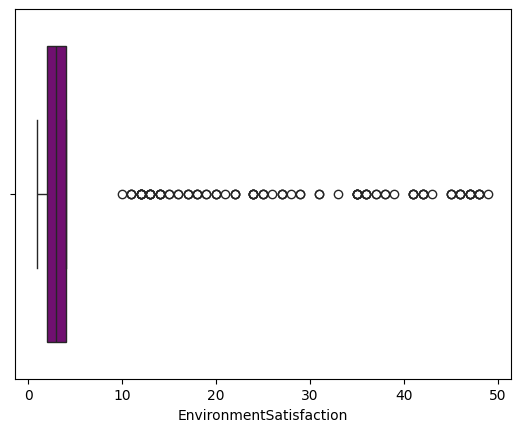

In [358]:
# Let's see how the 'EnvironmentSatisfaction' data is distributed through a boxplot. We observe that there is quite a bit of dispersion in the data.
sns.boxplot(data=df_clean,
            x='EnvironmentSatisfaction',
            color="purple");

##### To check the dispersion of the data, we review the percentage of each value in the "EnvironmentSatisfaction" column. 

In [359]:
# We obtain the percentage of data for each value.
percentage_ES= df_clean['EnvironmentSatisfaction'].value_counts(normalize=True) * 100
percentage_ES


EnvironmentSatisfaction
4     28.500620
3     28.438662
1     18.463445
2     18.401487
12     0.433705
35     0.371747
13     0.371747
14     0.309789
24     0.309789
47     0.309789
36     0.247831
48     0.247831
41     0.247831
46     0.247831
42     0.247831
45     0.185874
11     0.185874
22     0.185874
17     0.185874
18     0.185874
20     0.185874
25     0.185874
27     0.185874
37     0.123916
29     0.123916
19     0.123916
38     0.123916
31     0.123916
15     0.123916
16     0.123916
26     0.061958
39     0.061958
10     0.061958
49     0.061958
21     0.061958
28     0.061958
33     0.061958
43     0.061958
Name: proportion, dtype: float64

##### We see that the percentage of values above 4 are very small. Most of the data is between 1 and 4. Values above 4 are outliers, so we will replace them with the median to obtain a good data list.
##### The median is a float data type, so after performing the function, we must make sure that we put the correct data type back in our column.

In [360]:
print(df_clean['EnvironmentSatisfaction'].unique())


[ 1  3  4  2 42 37 35 25 27 31 39 21 15 14 33 19 12 13 28 47 36 29 24 46
 16 22 41 49 11 48 18 10 45 38 17 20 26 43]


In [361]:
#We calculate the median of 'EnvironmentSatisfaction'
mediana_EnvSat = df_clean['EnvironmentSatisfaction'].median()
mediana_EnvSat


3.0

In [362]:
# Define the median replacement function
def replace_env_satisfaction(EnvironmentSatisfaction, mediana_EnvSat):
    if EnvironmentSatisfaction > 4:
        return mediana_EnvSat
    else:
        return EnvironmentSatisfaction

#Apply the function to the 'EnvironmentSatisfaction' column to modify outliers
df_clean['EnvironmentSatisfaction'] = df_clean['EnvironmentSatisfaction'].apply(replace_env_satisfaction, mediana_EnvSat=mediana_EnvSat)

# Make sure that the column is of integer type
df_clean['EnvironmentSatisfaction'] = df_clean['EnvironmentSatisfaction'].astype(int)


print(df_clean['EnvironmentSatisfaction'])

0       1
1       3
2       3
3       1
4       1
       ..
1609    3
1610    3
1611    3
1612    1
1613    4
Name: EnvironmentSatisfaction, Length: 1614, dtype: int32


In [363]:
#We obtain the percentages of each value again to confirm that all the data is between 1 and 4
percentage_ES= df_clean['EnvironmentSatisfaction'].value_counts(normalize=True) * 100
percentage_ES

EnvironmentSatisfaction
3    34.634449
4    28.500620
1    18.463445
2    18.401487
Name: proportion, dtype: float64

In [364]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            1183 non-null   object
 1   Age                       1614 non-null   int64 
 2   Attrition                 1614 non-null   object
 3   BusinessTravel            842 non-null    object
 4   Department                302 non-null    object
 5   DistanceFromHome          1614 non-null   int64 
 6   Education                 1614 non-null   int64 
 7   EducationField            869 non-null    object
 8   EnvironmentSatisfaction   1614 non-null   int32 
 9   Gender                    1614 non-null   object
 10  JobInvolvement            1614 non-null   int64 
 11  JobLevel                  1614 non-null   int64 
 12  JobRole                   1614 non-null   object
 13  JobSatisfaction           1614 non-null   int64 
 14  MaritalStatus           

#### D) NULL HANDLING


In [365]:
df_clean.isnull().sum()[df_clean.isnull().sum()>0]

EmployeeNumber         431
BusinessTravel         772
Department            1312
EducationField         745
MaritalStatus          651
MonthlyIncome          843
OverTime               676
PerformanceRating      195
StandardHours         1195
TotalWorkingYears      526
WorkLifeBalance        108
YearsInCurrentRole    1580
dtype: int64

##### Revisamos los datos nulos de Employeenumber:

In [366]:
percent_null_estatus = (df_clean['EmployeeNumber'].isna().sum() / len(df_clean)) * 100
percent_null_estatus

26.703841387856258

In [367]:
valores_nulosEN = df_clean['EmployeeNumber'].isnull().sum()
valores_nulosEN

431

cambiamos los datos float a int

In [368]:
# Convertir la columna a numérico, forzando a NaN los valores no numéricos
df_clean['EmployeeNumber'] = pd.to_numeric(df_clean['EmployeeNumber'], errors='coerce')

# Convertir los valores numéricos a enteros, manteniendo los valores nulos como NaN
df_clean['EmployeeNumber'] = df_clean['EmployeeNumber'].astype('Int64')

# Convertir la columna a tipo objeto para reemplazar los valores nulos con 'Unknown'
df_clean['EmployeeNumber'] = df_clean['EmployeeNumber'].astype('object')



# Verificar la información del DataFrame
df_clean.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            1183 non-null   object
 1   Age                       1614 non-null   int64 
 2   Attrition                 1614 non-null   object
 3   BusinessTravel            842 non-null    object
 4   Department                302 non-null    object
 5   DistanceFromHome          1614 non-null   int64 
 6   Education                 1614 non-null   int64 
 7   EducationField            869 non-null    object
 8   EnvironmentSatisfaction   1614 non-null   int32 
 9   Gender                    1614 non-null   object
 10  JobInvolvement            1614 non-null   int64 
 11  JobLevel                  1614 non-null   int64 
 12  JobRole                   1614 non-null   object
 13  JobSatisfaction           1614 non-null   int64 
 14  MaritalStatus           

##### Now we can continue with the null handling

In [369]:
# Since we are not going to delete the column because of the null values, we replace the nulls with ‘Unknown’
df_clean['EmployeeNumber'] = df_clean['EmployeeNumber'].fillna('Unknown')
df_clean['EmployeeNumber']



0           162
1           259
2           319
3       Unknown
4       Unknown
         ...   
1609        967
1610        972
1611    Unknown
1612        990
1613    Unknown
Name: EmployeeNumber, Length: 1614, dtype: object

##### Since we are not going to delete the column for the null values, we replace the nulls with ‘Unknown’:

In [370]:
# Modification of null data by unknown in 'Deparment'.
df_clean['Department'] = df_clean['Department'].fillna('Unknown')
df_clean['Department']

0                        Unknown
1                        Unknown
2        Research & Development 
3                        Unknown
4                        Unknown
                  ...           
1609                     Unknown
1610                     Unknown
1611                     Unknown
1612                     Unknown
1613                     Unknown
Name: Department, Length: 1614, dtype: object

In [371]:
df_clean.isna().sum()[df_clean.isna().sum()>0]

BusinessTravel         772
EducationField         745
MaritalStatus          651
MonthlyIncome          843
OverTime               676
PerformanceRating      195
StandardHours         1195
TotalWorkingYears      526
WorkLifeBalance        108
YearsInCurrentRole    1580
dtype: int64

busniss travel tratamiento de nulos MODA PORKE ES CATEGORICA

In [372]:
#1. Calculate the mode of the column BusinessTravel'
mode_value = df_clean['BusinessTravel'].mode()[0]
# 2. Replace nulls with mode
df_clean['BusinessTravel'].fillna(mode_value, inplace=True)
df_clean['BusinessTravel'].isna().sum()


C:\Users\Lulú\AppData\Local\Temp\ipykernel_15992\4179174862.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['BusinessTravel'].fillna(mode_value, inplace=True)


0

EducationField tratamiento de nulos UNKNOWN porke no es igual ser tecnico ke doctor

In [373]:
# We replace null values ​​with "Unknown" since we do not have additional information in the database to obtain values
df_clean['EducationField'] = df_clean['EducationField'].fillna('Unknown')
df_clean['EducationField'].isna().sum()


0

MaritalStatus tratamiento de nulos xke en la satisfaccion (obejtivo final), puede influir su estado civil, no kereos inventarnos esta info

In [374]:
# We replace null values ​​with 'Unknown' since we do not have additional information in the database to obtain values
df_clean['MaritalStatus'] = df_clean['MaritalStatus'].fillna('Unknown')
df_clean['MaritalStatus'].isna().sum()

0

OverTime tratamiento de nulos MODA pues es categórica

In [375]:
#1. Calculate the mode of the column 'OverTime'
mode_value = df_clean['OverTime'].mode()[0]
# 2. Replace nulls with mode
df_clean['OverTime'].fillna(mode_value, inplace=True)
df_clean['OverTime'].isna().sum()

C:\Users\Lulú\AppData\Local\Temp\ipykernel_15992\4189722926.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['OverTime'].fillna(mode_value, inplace=True)


0

PerformanceRating tratamiento de nulos mediana. Para poder hacer la mediana, neesitamos ke sean datos int. Cambiamos a float primero, hacemos la mediana y luego cambiamos el tipo de dato de la columna a int puesto que todos los datos son enteros

In [376]:
# Column 'PerformanceRating' data type transformation


# 1. Reemplazar las comas por puntos
df_clean['PerformanceRating'] = df_clean['PerformanceRating'].replace(',', '.', regex=True)

# 2. Convertir la columna a float para manejar los valores decimales
df_clean['PerformanceRating'] = pd.to_numeric(df_clean['PerformanceRating'], errors='coerce')

# 3. Imputar los valores nulos con la mediana de la columna
median_value = df_clean['PerformanceRating'].median()
df_clean['PerformanceRating'].fillna(median_value, inplace=True)

# 4. Convertir la columna a tipo entero
df_clean['PerformanceRating'] = df_clean['PerformanceRating'].astype(int)

# Verificar el cambio de tipo
print(df_clean['PerformanceRating'].dtype)
print(df_clean['PerformanceRating'].unique())



int32
[3 4]


C:\Users\Lulú\AppData\Local\Temp\ipykernel_15992\3055309922.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['PerformanceRating'].fillna(median_value, inplace=True)


In [377]:
df_clean['PerformanceRating'].value_counts()

PerformanceRating
3    1400
4     214
Name: count, dtype: int64

'StandardHours' tratamiento de nulos: eliminación de la columna ya que aproximadamente el 74% de los valores son nulos, y el resto es la misma cifra (80), la cual no especifica si es semanal, quincenal o mensual.

In [378]:
# Remove StandardHours column
df_clean.drop(['StandardHours'], axis=1, inplace=True)

df_clean.head(10)

,EmployeeNumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
0,162,51,No,Travel_Rarely,Unknown,6,3,Unknown,1,Male,3,5,Research Director,3,Unknown,"19537,0",6462,7,No,13,3,3,0,NaN,5,"3,0",20,NaN,15,15,1972,Yes
1,259,52,No,Travel_Rarely,Unknown,1,4,Life Sciences,3,Male,2,5,Manager,3,Unknown,"19999,0",5678,0,No,14,3,1,1,"34,0",5,"3,0",33,NaN,11,9,1971,Yes
2,319,42,No,Travel_Rarely,Research & Development,4,2,Technical Degree,3,Male,3,5,Manager,4,Married,"19232,0",4933,1,No,11,3,4,0,"22,0",3,NaN,22,NaN,11,15,1981,Yes
3,Unknown,47,No,Travel_Rarely,Unknown,2,4,Medical,1,Female,3,4,Research Director,3,Married,"17169,0",26703,3,No,19,3,2,2,NaN,2,NaN,20,NaN,5,6,1976,No
4,Unknown,46,No,Travel_Rarely,Unknown,3,3,Technical Degree,1,Female,4,4,Sales Executive,1,Divorced,NaN,7739,2,No,12,3,4,1,NaN,5,"3,0",19,NaN,2,8,1977,No
5,1900,48,No,Travel_Rarely,Research & Development,22,3,Medical,4,Female,3,4,Manager,4,Unknown,"17174,0",2437,3,No,11,3,2,1,NaN,3,"3,0",22,NaN,4,7,1975,Yes
6,81,59,No,Travel_Rarely,Unknown,25,3,Life Sciences,1,Female,3,3,Sales Executive,1,Unknown,NaN,2354,7,No,11,3,4,0,"28,0",3,"2,0",21,NaN,7,9,1964,Yes
7,387,42,No,Travel_Rarely,Unknown,1,1,Unknown,2,Male,3,2,Sales Executive,3,Married,NaN,24532,1,No,25,4,3,0,"20,0",3,"3,0",20,NaN,11,6,1981,No
8,Unknown,41,No,Travel_Rarely,Unknown,2,5,Unknown,2,Female,3,4,Manager,1,Married,"16595,0",5626,7,No,16,3,2,1,"22,0",2,"3,0",18,NaN,11,8,1982,Yes
9,999,41,No,Travel_Frequently,Unknown,9,3,Unknown,1,Male,3,5,Research Director,3,Unknown,NaN,3735,2,No,17,3,2,1,"21,0",2,"4,0",18,NaN,0,11,1982,No


##### Treatment of nulls in the TotalWorkingYears column. We consider that it does not make sense to do mean/moda/median due to the large age difference between employees. Due to lack of information, we replace null with ‘Unknown’.

##### Before we do that, let's check if the floats are all .0, i.e. integers, and if so we convert them to int. Once that change is made, we replace the null values with ‘Unknown’.

In [379]:
df_clean['TotalWorkingYears'].unique()

array([nan, '34,0', '22,0', '28,0', '20,0', '21,0', '33,0', '40,0',
       '18,0', '25,0', '15,0', '17,0', '26,0', '16,0', '24,0', '14,0',
       '23,0', '27,0', '19,0', '11,0', '38,0', '37,0', '13,0', '12,0',
       '29,0', '10,0', '36,0', '35,0', '9,0', '31,0', '32,0', '8,0',
       '7,0', '30,0', '6,0', '5,0', '4,0', '3,0', '2,0', '1,0', '0,0'],
      dtype=object)

In [380]:
# Paso 1: Convertir la columna a numérica, estableciendo errores como 'coerce' para manejar valores no numéricos
df_clean['TotalWorkingYears'] = pd.to_numeric(df_clean['TotalWorkingYears'], errors='coerce')

# Paso 2: Convertir a tipo entero usando 'Int64' para manejar NaN
df_clean['TotalWorkingYears'] = df_clean['TotalWorkingYears'].astype('Int64')

# Paso 3: Reemplazar los valores NaN con 'Unknown' (convertir a tipo objeto si es necesario)
df_clean['TotalWorkingYears'] = df_clean['TotalWorkingYears'].astype('object')  # Asegurarse de que la columna sea de tipo objeto
df_clean['TotalWorkingYears'] = df_clean['TotalWorkingYears'].fillna('Unknown')

# Verificar si hay valores nulos restantes (debería ser 0)
print(f'El número de valores nulos en la columna TotalWorkingYears es de: {df_clean["TotalWorkingYears"].isna().sum()}')


El número de valores nulos en la columna TotalWorkingYears es de: 0


WorkLifeBalance imputación con SimpleImputer, hacemos boxplot para ver la dispersión

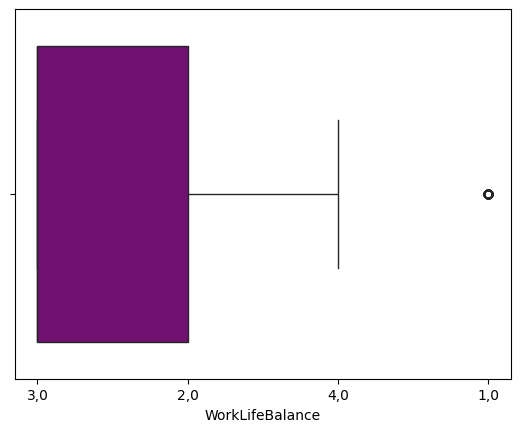

In [381]:
# Let's see how the 'BusinessTravel' data is distributed through a boxplot. We observe that there is quite a bit of dispersion in the data.
sns.boxplot(data=df_clean,
            x='WorkLifeBalance',
            color="purple");

In [382]:
# 1. Reemplazar las comas por puntos
df_clean['WorkLifeBalance'] = df_clean['WorkLifeBalance'].replace(',', '.', regex=True)



In [383]:
# necesitamos importar una librería especifica
from sklearn.impute import SimpleImputer

# Imputar con la media
imputer = SimpleImputer(strategy='mean')  
df_clean['WorkLifeBalance'] = imputer.fit_transform(df_clean[['WorkLifeBalance']])

'YearsInCurrentRole' imputación nulos: debido a que tenemos un 97%, decidimos eliminar la columna

In [384]:
# Remove StandardHours column
df_clean.drop(['YearsInCurrentRole'], axis=1, inplace=True)

df_clean.head(10)

,EmployeeNumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
0,162,51,No,Travel_Rarely,Unknown,6,3,Unknown,1,Male,3,5,Research Director,3,Unknown,"19537,0",6462,7,No,13,3,3,0,Unknown,5,3.000000,20,15,15,1972,Yes
1,259,52,No,Travel_Rarely,Unknown,1,4,Life Sciences,3,Male,2,5,Manager,3,Unknown,"19999,0",5678,0,No,14,3,1,1,Unknown,5,3.000000,33,11,9,1971,Yes
2,319,42,No,Travel_Rarely,Research & Development,4,2,Technical Degree,3,Male,3,5,Manager,4,Married,"19232,0",4933,1,No,11,3,4,0,Unknown,3,2.759628,22,11,15,1981,Yes
3,Unknown,47,No,Travel_Rarely,Unknown,2,4,Medical,1,Female,3,4,Research Director,3,Married,"17169,0",26703,3,No,19,3,2,2,Unknown,2,2.759628,20,5,6,1976,No
4,Unknown,46,No,Travel_Rarely,Unknown,3,3,Technical Degree,1,Female,4,4,Sales Executive,1,Divorced,NaN,7739,2,No,12,3,4,1,Unknown,5,3.000000,19,2,8,1977,No
5,1900,48,No,Travel_Rarely,Research & Development,22,3,Medical,4,Female,3,4,Manager,4,Unknown,"17174,0",2437,3,No,11,3,2,1,Unknown,3,3.000000,22,4,7,1975,Yes
6,81,59,No,Travel_Rarely,Unknown,25,3,Life Sciences,1,Female,3,3,Sales Executive,1,Unknown,NaN,2354,7,No,11,3,4,0,Unknown,3,2.000000,21,7,9,1964,Yes
7,387,42,No,Travel_Rarely,Unknown,1,1,Unknown,2,Male,3,2,Sales Executive,3,Married,NaN,24532,1,No,25,4,3,0,Unknown,3,3.000000,20,11,6,1981,No
8,Unknown,41,No,Travel_Rarely,Unknown,2,5,Unknown,2,Female,3,4,Manager,1,Married,"16595,0",5626,7,No,16,3,2,1,Unknown,2,3.000000,18,11,8,1982,Yes
9,999,41,No,Travel_Frequently,Unknown,9,3,Unknown,1,Male,3,5,Research Director,3,Unknown,NaN,3735,2,No,17,3,2,1,Unknown,2,4.000000,18,0,11,1982,No


##### Finally, we will do the null treatment of the ‘MonthlySalary’ column. We decide to impute them with an inference method: IterativeImputer


In [385]:
# Reemplazar la coma por un punto en los valores que tienen ',' como separador decimal
df_clean['MonthlyIncome'] = df_clean['MonthlyIncome'].str.replace(',', '.')
# Convertir las cadenas a valores numéricos (float), reemplazando los 'nan' por NaN
df_clean['MonthlyIncome'] = pd.to_numeric(df_clean['MonthlyIncome'], errors='coerce')
# Crear el imputador IterativeImputer
imputador = IterativeImputer(max_iter=10, random_state=0)
# Aplicar el imputador a la columna MonthlyIncome
df_clean[['MonthlyIncome']] = imputador.fit_transform(df_clean[['MonthlyIncome']])

In [386]:
df_clean['MonthlyIncome'].isna().sum()

0

In [387]:
df_clean.shape

(1614, 31)

In [388]:
percent_null = (df_clean.isnull().sum()/df_clean.shape[0])*100
percent_null

EmployeeNumber              0.0
Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsSinceLastPromotion     0.0
YearsWithCurrManager        0.0
DateBirth                   0.0
RemoteWork                  0.0
dtype: f

#### D) DUPLICATED HANDLING

In [389]:
# Check for duplicate rows after the homogenitazion
df_clean.duplicated().sum()

59

In [390]:
df_clean['EmployeeNumber'].duplicated().sum()

534

In [391]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            1614 non-null   object 
 1   Age                       1614 non-null   int64  
 2   Attrition                 1614 non-null   object 
 3   BusinessTravel            1614 non-null   object 
 4   Department                1614 non-null   object 
 5   DistanceFromHome          1614 non-null   int64  
 6   Education                 1614 non-null   int64  
 7   EducationField            1614 non-null   object 
 8   EnvironmentSatisfaction   1614 non-null   int32  
 9   Gender                    1614 non-null   object 
 10  JobInvolvement            1614 non-null   int64  
 11  JobLevel                  1614 non-null   int64  
 12  JobRole                   1614 non-null   object 
 13  JobSatisfaction           1614 non-null   int64  
 14  MaritalS

##### Let's review the rows with duplicate EmployeeNumber to see how to handle these duplicate rows.

##### We check for duplicate rows regardless of rows where EmployeeNumber is ‘Unknown’. 

In [392]:
# Filtrar las filas donde EmployeeNumber no es 'Unknown'
df_filtered = df_clean[df_clean['EmployeeNumber'] != 'Unknown']

# Mostrar las filas con valores duplicados en EmployeeNumber para una revisión más detallada
df_filtered_duplicates = df_filtered[df_filtered.duplicated(subset='EmployeeNumber', keep=False)]

# Ordenar los resultados por EmployeeNumber de forma ascendente
df_filtered_duplicates = df_filtered_duplicates.sort_values(by='EmployeeNumber')

# Mostrar las primeras 59 filas del DataFrame ordenado
print(df_filtered_duplicates.to_string())

     EmployeeNumber  Age Attrition     BusinessTravel                Department  DistanceFromHome  Education    EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel                      JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  DateBirth RemoteWork
82              307   38        No      Travel_Rarely                   Unknown                 3          3     Life Sciences                        1    Male               3         3             Sales Executive                 3      Divorced    6477.686122         9647                   0       No                 12                  3                         3                 2           Unknown                      6         2.000000              16              

In [393]:
# Contar el número de filas en el DataFrame
num_rows = df_filtered_duplicates.shape[0]
print(f"Número de filas: {num_rows}")


Número de filas: 208


#### After reviewing our 208 duplicate rows (without 'Unknow' rows and after our Product Owner has discussed this situation with the customer, we need to do the following:
- For Remote Work, if there are discrepancies, take the value ‘No’.
- For Distance From Home, take the lower value or average the values if both are consistent.

In [395]:
import pandas as pd

# Agrupar por EmployeeNumber para aplicar las reglas
def resolve_duplicates(group):
    # Para Remote Work: si hay discrepancias, tomar el valor 'No'
    if group['RemoteWork'].nunique() > 1:
        remote_work_value = 'No'
    else:
        remote_work_value = group['RemoteWork'].iloc[0]
    
    # Para Distance From Home: tomar el valor más bajo o el promedio si son consistentes
    if group['DistanceFromHome'].nunique() > 1:
        distance_value = group['DistanceFromHome'].min()  # Tomar el valor más bajo
    else:
        distance_value = group['DistanceFromHome'].mean()  # O el promedio si son consistentes
    
    # Asegurarnos de que DistanceFromHome sea un entero
    distance_value = int(distance_value)
    
    # Devolver una fila combinada con los valores establecidos
    return pd.Series({
        'EmployeeNumber': group['EmployeeNumber'].iloc[0],
        'RemoteWork': remote_work_value,
        'DistanceFromHome': distance_value,
        # Copiar el resto de las columnas
        **group.drop(columns=['RemoteWork', 'DistanceFromHome']).iloc[0]
    })

# Aplicar la función de resolución de duplicados a cada grupo
df_resolved = df_filtered_duplicates.groupby('EmployeeNumber').apply(resolve_duplicates).reset_index(drop=True)

# Mostrar el DataFrame resultante
print(df_resolved.to_string())



     EmployeeNumber RemoteWork  DistanceFromHome  Age Attrition     BusinessTravel                Department  Education    EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel                      JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  DateBirth
0               307        Yes                 3   38        No      Travel_Rarely                   Unknown          3     Life Sciences                        1    Male               3         3             Sales Executive                 3      Divorced    6477.686122         9647                   0       No                 12                  3                         3                 2           Unknown                      6         2.000000              16   

C:\Users\Lulú\AppData\Local\Temp\ipykernel_15992\845445044.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_resolved = df_filtered_duplicates.groupby('EmployeeNumber').apply(resolve_duplicates).reset_index(drop=True)


##### Once we have managed the duplicate rows where the 'EmployeeNumber' is identified, let's concatenate it with the rest of the rows where the 'EmployeeNumber' is ‘Unknown’.

In [396]:
# Filtrar las filas donde EmployeeNumber es 'Unknown'
df_unknown = df_clean[df_clean['EmployeeNumber'] == 'Unknown']

# Filtrar las filas donde EmployeeNumber no es 'Unknown'
df_filtered = df_clean[df_clean['EmployeeNumber'] != 'Unknown']

# Mostrar las filas con valores duplicados en EmployeeNumber para una revisión más detallada
df_filtered_duplicates = df_filtered[df_filtered.duplicated(subset='EmployeeNumber', keep=False)]

# Aplicar la función de resolución de duplicados a cada grupo
df_resolved = df_filtered_duplicates.groupby('EmployeeNumber').apply(resolve_duplicates).reset_index(drop=True)

# Combinar los duplicados resueltos con las filas que contienen 'Unknown'
df_clean_final = pd.concat([df_resolved, df_unknown], ignore_index=True)

# Mostrar el DataFrame combinado completo sin ordenar
print(df_clean_final.to_string())





    EmployeeNumber RemoteWork  DistanceFromHome  Age Attrition     BusinessTravel                Department  Education    EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel                      JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  DateBirth
0              307        Yes                 3   38        No      Travel_Rarely                   Unknown          3     Life Sciences                        1    Male               3         3             Sales Executive                 3      Divorced    6477.686122         9647                   0       No                 12                  3                         3                 2           Unknown                      6         2.000000              16     

C:\Users\Lulú\AppData\Local\Temp\ipykernel_15992\4134795675.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_resolved = df_filtered_duplicates.groupby('EmployeeNumber').apply(resolve_duplicates).reset_index(drop=True)


In [397]:
df_clean_final['EmployeeNumber'].duplicated().sum()

430

In [398]:
# Check for duplicate rows after the elimination
df_clean_final.duplicated().sum()

21

In [399]:
df_clean_final['EmployeeNumber'].value_counts()

EmployeeNumber
Unknown    431
717          1
972          1
967          1
966          1
          ... 
502          1
501          1
500          1
495          1
710          1
Name: count, Length: 105, dtype: int64

# PHASE 4 A/B TESTING
Determinar si existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados, y si de ser así, determinar cuál es la magnitud de esa relación.

In [400]:
#Creamos una nueva columna que se llama"SatisfactionLevel" donde los empleados se dividen entre: Grupo A (Control): 
# Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 5 
# y Grupo B (Variante): Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala.

df_clean_final['SatisfactionLevel'] = df_clean_final['JobSatisfaction'].apply(lambda x: 'A' if x >= 3 else 'B')

# Mostrar el DataFrame con la nueva columna
df_clean_final


,EmployeeNumber,RemoteWork,DistanceFromHome,Age,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,SatisfactionLevel
0,307,Yes,3,38,No,Travel_Rarely,Unknown,3,Life Sciences,1,Male,3,3,Sales Executive,3,Divorced,6477.686122,9647,0,No,12,3,3,2,Unknown,6,2.000000,16,5,13,1985,A
1,374,Yes,1,55,No,Travel_Rarely,Unknown,3,Medical,4,Male,3,5,Manager,1,Single,19045.000000,18938,0,No,14,3,3,0,Unknown,2,3.000000,36,4,13,1968,B
2,376,No,10,47,Yes,Non-Travel,Unknown,4,Life Sciences,1,Male,3,3,Manager,2,Married,6477.686122,10268,1,No,12,3,4,1,Unknown,2,2.000000,10,9,9,1976,B
3,381,No,22,35,No,Travel_Rarely,Unknown,3,Life Sciences,2,Female,4,3,Manager,2,Divorced,6477.686122,19100,7,No,18,3,2,1,Unknown,6,2.000000,7,6,2,1988,B
4,388,Yes,2,29,No,Travel_Frequently,Unknown,2,Unknown,2,Male,3,2,Sales Executive,4,Single,6477.686122,20260,1,No,18,3,1,0,Unknown,3,2.759628,10,0,9,1994,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,Unknown,No,43,28,No,Travel_Rarely,Sales,4,Unknown,3,Female,3,2,Sales Executive,2,Unknown,6477.686122,3698,1,No,20,4,1,0,Unknown,2,3.000000,8,7,5,1995,B
531,Unknown,Yes,5,26,Yes,Travel_Rarely,Unknown,2,Medical,3,Female,2,1,Research Scientist,3,Married,2366.000000,20898,1,No,14,3,1,1,Unknown,2,3.000000,8,1,7,1997,A
532,Unknown,Yes,12,31,No,Travel_Rarely,Unknown,3,Medical,4,Female,3,2,Healthcare Representative,4,Unknown,6477.686122,17369,0,No,11,3,3,2,Unknown,2,1.000000,9,8,5,1992,A
533,Unknown,Yes,13,39,No,Travel_Rarely,Unknown,5,Unknown,3,Male,4,3,Sales Executive,3,Single,6477.686122,2560,0,No,18,3,4,0,Unknown,3,3.000000,8,0,7,1984,A


2. Se calcula la tasa de rotación (porcentaje de empleados que dejaron la empresa) en cada grupo.

In [401]:
# Contar el número total de empleados en cada grupo
total_empleados = df_clean_final.groupby('SatisfactionLevel').size()

# Contar el número de empleados que dejaron la empresa en cada grupo
empleados_que_dejaron = df_clean_final[df_clean_final['Attrition'] == 'Yes'].groupby('SatisfactionLevel').size()

# Calcular la tasa de rotación (porcentaje de empleados que dejaron la empresa)
tasa_rotacion = (empleados_que_dejaron / total_empleados) * 100

tasa_rotacion

SatisfactionLevel
A    12.688822
B    19.607843
dtype: float64

3. Se realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B.

In [402]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(df_clean_final['SatisfactionLevel'], df_clean_final['Attrition'])

# Realizar la prueba de chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("\nPrueba de Chi-Cuadrado:")
print(f"Chi-cuadrado: {chi2}")
print(f"P-valor: {p_value}")

# Interpretar el p-valor
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa en la tasa de rotación entre los grupos.")
else:
    print("No hay una diferencia significativa en la tasa de rotación entre los grupos.")



Prueba de Chi-Cuadrado:
Chi-cuadrado: 4.1378695503805245
P-valor: 0.04193391409694588
Hay una diferencia significativa en la tasa de rotación entre los grupos.


5.Calcula la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo.

In [403]:
# Calcular la diferencia de medias 
diferencia_medianas = tasa_rotacion['B'] - tasa_rotacion['A']

print("Porcentaje de empleados que han dejado la empresa en cada grupo:")
print(tasa_rotacion)

# Mostrar la diferencia de medias
print(f"\nDiferencia de medias en la tasa de rotación entre los grupos:")
print(f"Diferencia: {diferencia_medianas:.2f}%")

Porcentaje de empleados que han dejado la empresa en cada grupo:
SatisfactionLevel
A    12.688822
B    19.607843
dtype: float64

Diferencia de medias en la tasa de rotación entre los grupos:
Diferencia: 6.92%


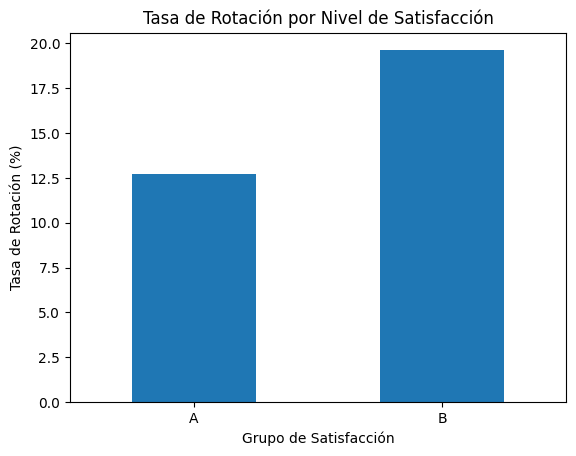

In [404]:
# Visualization
tasa_rotacion.plot(kind='bar')
plt.title('Tasa de Rotación por Nivel de Satisfacción')
plt.ylabel('Tasa de Rotación (%)')
plt.xlabel('Grupo de Satisfacción')
plt.xticks(rotation=0)  # Para que las etiquetas no se roten
plt.show()

# CONCLUSIÓN:

### El análisis sugiere que existe una relación significativa entre el nivel de satisfacción laboral y la rotación de empleados. Los empleados del grupo B, que tienen un nivel de satisfacción menor a 3, muestran una mayor tasa de rotación en comparación con aquellos en el grupo A, quienes tienen un nivel de satisfacción igual o superior a 3. 

### El resultado de la prueba de Chi-cuadrado ha indicado una diferencia significativa en las tasas de rotación entre los dos grupos, lo que sugiere que el nivel de satisfacción laboral influye en la retención de empleados. Con base en estos resultados, se puede concluir que los empleados con una mayor satisfacción laboral tienden a quedarse más tiempo en la empresa, mientras que aquellos con menor satisfacción son más propensos a abandonarla.

### *Resultados concretos:* 
#### La diferencia observada en las tasas de rotación respalda la hipótesis y destaca la importancia de la satisfacción laboral para la retención de empleados. Mejorar factores clave relacionados con la satisfacción podría, en última instancia, reducir la rotación y mejorar la retención de talento.

### *Acciones sugeridas:* 
#### Se sugiere que la empresa implemente estrategias para incrementar la satisfacción laboral, especialmente para aquellos empleados que se sienten menos satisfechos.

### *Claridad en la interpretación:* 
#### Se hace énfasis en la importancia de los hallazgos para mejorar la retención laboral, indicando que los empleados con mayor satisfacción tienden a permanecer más tiempo en la empresa.

### *Limitaciones del análisis:*
#### Una posible limitación del análisis es que se basa únicamente en el nivel de satisfacción reportado por los empleados, lo que puede no capturar todos los factores que influyen en su decisión de abandonar la empresa. Además, no hemos considerado otros factores que podrían impactar la rotación, como las oportunidades de promoción o el balance entre la vida personal y laboral.
### Por otro lado, el tamaño de la muestra o cualquier posible sesgo en los datos, para que los resultados no sean malinterpretados.


### *Próximos pasos:*
#### Para profundizar en este análisis, sería útil realizar estudios adicionales que consideren otros factores como el desarrollo profesional, el salario, o la cultura organizacional, los cuales podrían influir en la satisfacción y la retención de empleados. También podría ser beneficioso realizar encuestas adicionales para confirmar los hallazgos y obtener una visión más completa de los factores que afectan la rotación.